# 따릉이로 알아보는 출근과 퇴근의 차이


우리는 보통 출근과 퇴근을 합쳐서 출퇴근이란 표현을 사용한다.  
그렇다면 실제로 출근과 퇴근은 비슷하게 이루어질까?  
차를 타거나 지하철을 타거나 버스를 타도, 출퇴근 시간에는 엄청 붐비게 된다.  
따라서 우리는 그냥 출퇴근 시간을 그저 사람이 붐비는 시간이라고 인식하게 된다.  
하지만 출근과 퇴근을 그저 사람이 많다는 이유로 동일시 하는 것이 논리적일까?  

이번 분석은 따릉이를 통해 비슷하다고 생각되어지는  
1. 출근과 퇴근의 차이점을 밝혀내고  
2. 따릉이의 재배치를 출근 시간대와 최근 시간대에 다르게 이루어져야 한다고 주장한다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# data load
nodes = pd.read_csv('../data/bike_node(21.01.31).csv')
links1 = pd.read_csv('../data/group_weekday.csv')
links2 = pd.read_csv('../data/group_weekend.csv')
links3 = pd.read_csv('../data/group_on.csv')
links4 = pd.read_csv('../data/group_off.csv')

# x 보다 큰 것만 생각하기
def new_links(x, n):
    x = x[x['number'] > n]
    return x

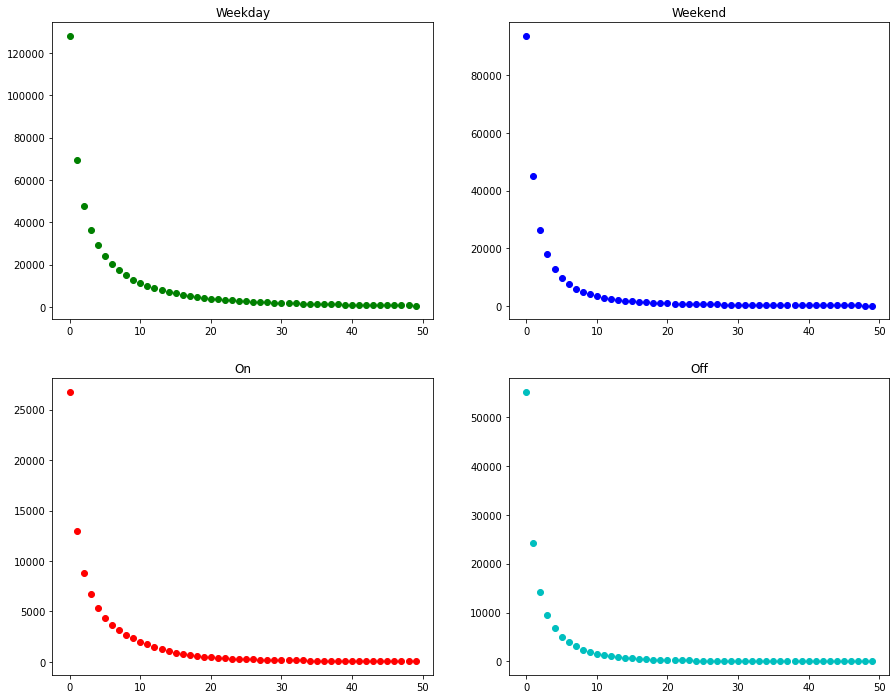

In [4]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(15)

axs[0, 0].set_title("Weekday")
axs[0, 1].set_title("Weekend")
axs[1, 0].set_title("On")
axs[1, 1].set_title("Off")

for i in range(50):
    axs[0, 0].plot(i, len(new_links(links1, i)), 'go')
    axs[0, 1].plot(i, len(new_links(links2, i)), 'bo')
    axs[1, 0].plot(i, len(new_links(links3, i)), 'ro')
    axs[1, 1].plot(i, len(new_links(links4, i)), 'oc')

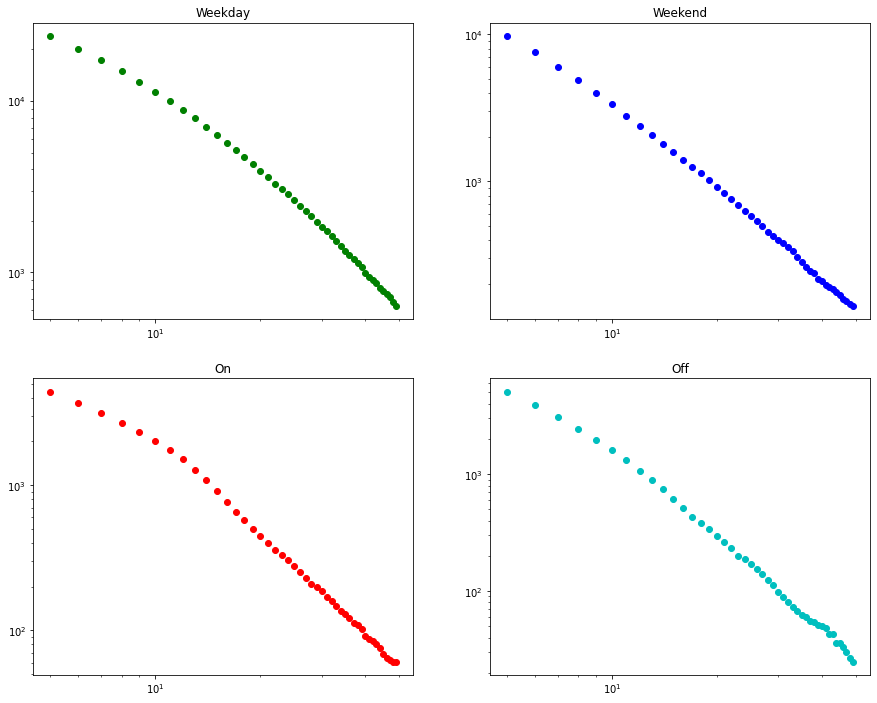

In [5]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(15)

axs[0, 0].set_title("Weekday")
axs[0, 1].set_title("Weekend")
axs[1, 0].set_title("On")
axs[1, 1].set_title("Off")

for i in range(5, 50):
    axs[0, 0].loglog(i, len(new_links(links1, i)), 'go')
    axs[0, 1].loglog(i, len(new_links(links2, i)), 'bo')
    axs[1, 0].loglog(i, len(new_links(links3, i)), 'ro')
    axs[1, 1].loglog(i, len(new_links(links4, i)), 'oc')

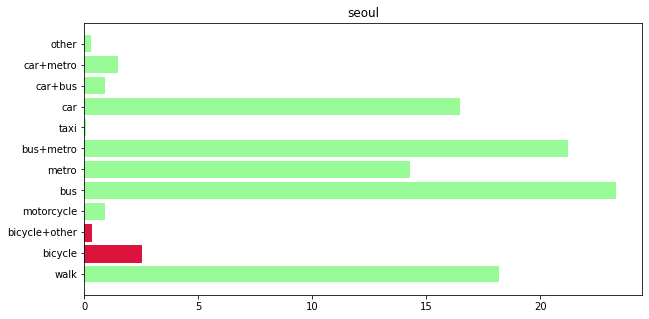

In [6]:
# 통근 데이터
commute = pd.read_table('../data/출퇴근.txt', sep = ',').T

# 통근 데이터 시각화 함수 
def commute_1(x):
    index = commute.index[3:]
    name = commute[x][2]

    data = commute[x].values.tolist()[3:]
    data = [float(i) for i in data]

    barh = plt.barh(index, data, color = 'palegreen', label = 'name')

    barh[1].set_color('crimson')
    barh[2].set_color('crimson')

    plt.title(name)

# plot 사이즈 조절
plt.figure(figsize = (10, 5))

# index는 data 보고 결정
commute_1(0)

아래 plot은 따릉이의 거리를 나타냈다.
대부분의 distance가 2km 미만의 짧은 경로를 취하고 있는것을 확인할 수 있다.

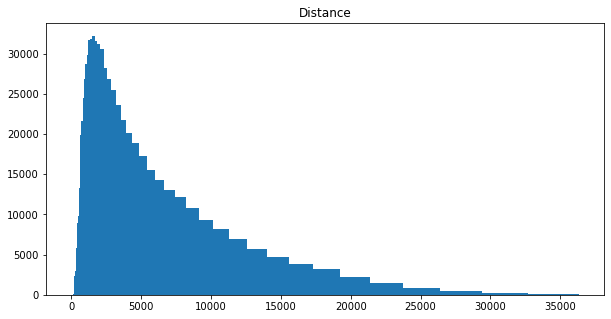

In [10]:
# 따릉이 이용 데이터
use = np.load('../data/data.npz', allow_pickle = True)
use = use['arr_0']

# 따릉이 데이터 histogram
plt.figure(figsize = (10, 5))
plt.title('Distance')

bins = np.exp(np.linspace(0, 10.5, 100))

N, bins, patches = plt.hist(use[:, 10], bins)